In [1]:
import datetime
import time
import random
import requests
import json
import bson
import gzip
import os
from base64 import b64encode
from copy import deepcopy
from unittest import TestCase
from IPython import display

case = TestCase()


LOCAL = 'http://localhost:8000/'
REMOTE = 'https://api-recintos.herokuapp.com/'
HOME = LOCAL

In [2]:
inspecao_modelo = {
  "IDEvento": 0,
  "dataevento": "2019-05-28T12:18:41.204Z",
  "dataregistro": "2019-05-28T12:18:41.204Z",
  "operadorevento": "string",
  "operadorregistro": "string",
  "anexos": [
    {
      "datacriacao": "2019-05-31T02:55:50.300000+00:00",
      "datamodificacao": "2019-05-31T02:55:50.300000+00:00"
    }
  ],
  "identificadores": [
    {
      "identificador": "string"
    }
  ],
  "retificador": False,
  "capturaautomatica": True,
  "documentotransporte": "150",
  "numero": "TESTE1234",
  "placa": "TST1234",
  "placasemireboque": "TST5678",
  "tipodocumentotransporte": "CE"
}

In [3]:
inspecoes = []
for ind, image in enumerate(os.listdir('images'), 1):
    content = open(os.path.join('images', image), 'rb')
    base64_bytes = b64encode(content.read())
    base64_string = base64_bytes.decode('utf-8')
    _inspecao = deepcopy(inspecao_modelo)
    _inspecao['IDEvento'] = ind
    _inspecao['numero'] = _inspecao['numero'] + str(ind)
    _inspecao['anexos'][0]['content'] = base64_string
    _inspecao['anexos'][0]['nomearquivo'] = image
    inspecoes.append(_inspecao)

inspecoes_bson = []
for ind, image in enumerate(os.listdir('images'), 1):
    content = open(os.path.join('images', image), 'rb').read()
    _inspecao = deepcopy(inspecao_modelo)
    _inspecao['IDEvento'] = ind
    _inspecao['numero'] = _inspecao['numero'] + str(ind)
    _inspecao['anexos'][0]['content'] = content
    _inspecao['anexos'][0]['nomearquivo'] = image
    inspecoes_bson.append(_inspecao)

In [4]:
print(len(inspecoes))

24


In [5]:
inspecoes[0]

{'IDEvento': 1,
 'dataevento': '2019-05-28T12:18:41.204Z',
 'dataregistro': '2019-05-28T12:18:41.204Z',
 'operadorevento': 'string',
 'operadorregistro': 'string',
 'anexos': [{'datacriacao': '2019-05-31T02:55:50.300000+00:00',
   'datamodificacao': '2019-05-31T02:55:50.300000+00:00',
   'content': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADIAa8DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGV

In [6]:
inspecoes_bson[0]

{'IDEvento': 1,
 'dataevento': '2019-05-28T12:18:41.204Z',
 'dataregistro': '2019-05-28T12:18:41.204Z',
 'operadorevento': 'string',
 'operadorregistro': 'string',
 'anexos': [{'datacriacao': '2019-05-31T02:55:50.300000+00:00',
   'datamodificacao': '2019-05-31T02:55:50.300000+00:00',
   'content': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xc8\x01\xaf\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x

## Teste de tamanho de arquivos com anexos json, bson e gzip

In [7]:
def tofile(lista, newfilename, zipped=False):
    """Salva instância em arquivo (padrão BSON)."""
    with open(newfilename, 'wb') as f:
        payload = bson.BSON.encode(lista)
        if zipped:
            payload = gzip.compress(payload)
        f.write(payload)

json_pesagens = {'InspecaonaoInvasiva': inspecoes}

with open('testimg.json', 'w', encoding='utf-8', newline='') as json_out:
    json.dump(json_pesagens, json_out)
size_json = os.path.getsize('testimg.json')

with open('testimg.json.gzip', 'wb') as json_out:
    payload = json.dumps(json_pesagens)
    payload = gzip.compress(payload.encode('utf-8'))
    json_out.write(payload)
size_jsongzip = os.path.getsize('testimg.json.gzip')

bson_pesagens = {'InspecaonaoInvasiva': inspecoes_bson}
tofile(bson_pesagens, 'testimg.bson')
size_bson = os.path.getsize('testimg.bson')

tofile(bson_pesagens, 'testimg.bson.gzip', zipped=True)
size_bsongzip = os.path.getsize('testimg.bson.gzip')


In [8]:
print('size_json: %d, %d%s' % (size_json, (size_json/size_json)*100, '%'))
print('size_json_gzip: %d, %d%s ' % (size_jsongzip, (size_jsongzip/size_json)*100, '%'))
print('size_bson: %d, %d%s ' % (size_bson, (size_bson/size_json)*100, '%'))
print('size_bson_gzip: %d, %d%s ' % (size_bsongzip, (size_bsongzip/size_json)*100, '%'))

original_size = 0
for image in os.listdir('images'):
    original_size+=os.path.getsize(os.path.join('images', image))
    
print('original_size: %d, %d%s ' % (original_size, (original_size/size_json)*100, '%'))

size_json: 620659, 100%
size_json_gzip: 447835, 72% 
size_bson: 468733, 75% 
size_bson_gzip: 440260, 70% 
original_size: 454993, 73% 


In [23]:
for inspecao in inspecoes:
    r = requests.post(HOME + 'inspecaonaoinvasiva', json=inspecao)
    print(r.status_code)
    print(r.text)

201
{
  "detail": -3402784176570326393,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": 4535954522132294856,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": -2349335339397909659,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": 7858694238138899751,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": 314742820516384716,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": -8057150148463316833,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": 3224624907008090107,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": -8819203047520219258,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": -5910959307809938387,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": -8138989095984243489,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": -2063136635345140074,
  "status": 201,
  "title": "Evento incluido"
}

201
{
  "detail": -5466940

In [25]:
r = requests.get(HOME + 'inspecaonaoinvasiva/1')
print(r.status_code)
print(r.json())

200
{'ID': 1, 'IDEvento': 1, 'anexos': [{'content': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADIAa8DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0/wCJzSL8PdSMRYPvgGVbacGZAcHtxkV5TpGrL/bsK6bFe6awtCspjvTIZDuXnmvXviCYl8Cao8wBRERiCe4dSP1xXl9lZ2ra0stlEigrjg9ty+/tQB0

In [26]:
case.assertDictContainsSubset(inspecoes[0]['anexos'][0], dict(r.json())['anexos'][0])


AssertionError: Mismatched values: 'datacriacao', expected: '2019-05-31T02:55:50.300000+00:00', actual: '2019-05-31T02:55:50.300000Z','datamodificacao', expected: '2019-05-31T02:55:50.300000+00:00', actual: '2019-05-31T02:55:50.300000Z'

# Endpoints para anexar arquivo por form/multidata

### Primeiro envia um Evento SEM anexos (sem campos content, contentType e nomearquivo)

In [3]:
r = requests.post(HOME + 'inspecaonaoinvasiva',
                  json=inspecao_modelo)
print(r.status_code)
print(r.text)

201
{
  "detail": 8658492321094905794,
  "status": 201,
  "title": "Evento incluido"
}



In [6]:
r = requests.get(HOME + 'inspecaonaoinvasiva/0')
print(r.status_code)
print(r.json())

200
{'ID': 1, 'IDEvento': 0, 'anexos': [{'contentType': '', 'datacriacao': '2019-05-31T02:55:50.300000Z', 'datamodificacao': '2019-05-31T02:55:50.300000Z', 'nomearquivo': ''}], 'capturaautomatica': True, 'dataevento': '2019-05-28T12:18:41.204000Z', 'dataregistro': '2019-05-28T12:18:41.204000Z', 'documentotransporte': '150', 'hash': 8658492321094905794, 'identificadores': [{'identificador': 'string'}], 'numero': 'TESTE1234', 'operadorevento': 'string', 'operadorregistro': 'string', 'placa': 'TST1234', 'placasemireboque': 'TST5678', 'recinto': '00001', 'request_IP': '127.0.0.1', 'retificador': False, 'time_created': '2019-06-07T19:50:41.934306Z', 'tipodocumentotransporte': 'CE'}


In [7]:
try:
    case.assertDictContainsSubset(inspecao_modelo, r.json())
except AssertionError as err:
    print(err)

Mismatched values: 'dataevento', expected: '2019-05-28T12:18:41.204Z', actual: '2019-05-28T12:18:41.204000Z','dataregistro', expected: '2019-05-28T12:18:41.204Z', actual: '2019-05-28T12:18:41.204000Z','anexos', expected: [{'datacriacao': '2019-05-31T02:55:50.300000+00:00', 'datamodificacao': '2019-05-31T02:55:50.300000+00:00'}], actual: [{'contentType': '', 'datacriacao': '2019-05-31T02:55:50.300000Z', 'datamodificacao': '2019-05-31T02:55:50.300000Z', 'nomearquivo': ''}]


In [32]:
# Manda arquivo vazio...
files = {} #{'file': (images[0], image, 'image/jpeg')}
headers = {}
data = {'IDEvento': 0, 'tipoevento': 'InspecaonaoInvasiva'}
# headers['Content-Type'] = 'image/jpeg'
r = requests.post(HOME + 'upload_file',
                  data=data,
                  files=files,
                  headers=headers)
print(r.status_code)
print(r.text)

400
[
  {
    "detail": "Arquivo nao informado", 
    "status": 400, 
    "title": "Evento ou consulta invalidos (BAD Request)"
  }, 
  400
]



In [33]:
# Manda ID errado...
filename = os.listdir('images')[0]
image = open(os.path.join('images', filename), 'rb').read()
files = {'file': (filename, image, 'image/jpeg')}
headers = {}
data = {'IDEvento': 1000000, 'tipoevento': 'InspecaonaoInvasiva'}
# headers['Content-Type'] = 'image/jpeg'
r = requests.post(HOME + 'upload_file',
                  data=data,
                  files=files,
                  headers=headers)
print(r.status_code)
print(r.text)

404
[
  {
    "detail": "Evento n\u00e3o encontrado.", 
    "status": 404, 
    "title": "Evento ou recurso nao encontrado"
  }, 
  404
]



In [34]:
data = {'IDEvento': 0, 'tipoevento': 'InspecaonaoInvasiva'}
# headers['Content-Type'] = 'image/jpeg'
r = requests.post(HOME + 'upload_file',
                  data=data,
                  files=files,
                  headers=headers)
print(r.status_code)
print(r.text)

201
[
  {
    "detail": -8347497061647097795, 
    "status": 201, 
    "title": "Evento incluido"
  }, 
  201
]



In [35]:
r = requests.get(HOME + 'inspecaonaoinvasiva/0')
print(r.status_code)
print(r.json())

200
{'ID': 25, 'IDEvento': 0, 'anexos': [{'content': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADIAa8DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0/wCJzSL8PdSMRYPvgGVbacGZAcHtxkV5TpGrL/bsK6bFe6awtCspjvTIZDuXnmvXviCYl8Cao8wBRERiCe4dSP1xXl9lZ2ra0stlEigrjg9ty+/tQB

In [44]:
r = requests.get(HOME + 'get_file', data=data)
print(r.status_code)
print(r.text)

200
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADIAa8DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0/wCJzSL8PdSMRYPvgGVbacGZAcHtxkV5TpGrL/bsK6bFe6awtCspjvTIZDuXnmvXviCYl8Cao8wBRERiCe4dSP1xXl9lZ2ra0stlEigrjg9ty+/tQB0tnqmqLJsbVLuQHu7nP863DPfgnGoXAP8AvViwxSQtvdRtA55r

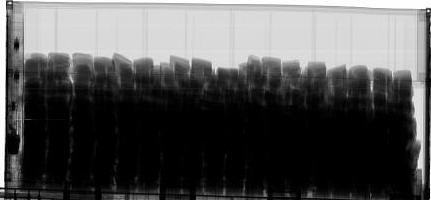

In [45]:
display.Image(image)

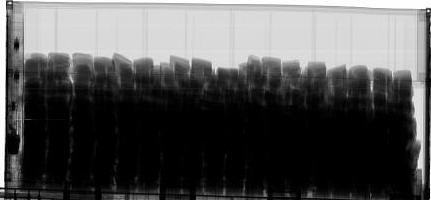

In [46]:
from base64 import b64decode
display.Image(b64decode(r.text.encode()))

In [52]:
assert b64decode(r.text.encode()) == image